<a href="https://colab.research.google.com/github/asu-trans-ai-lab/OSM2GMNS/blob/master/osm2gmns_quickstart_Gilbert_AZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __OSM2GMNS Quickstart Notebook__

OSM2GMNS is a Python package that helps generate high-fidelity mesoscopic transportation network models from OpenStreetMap data. This enables even the smallest transportation authorities to begin analysis with a high quality network model for future analysis. 


# 1. Data Collection
We rely on a few open-source projects to gather the raw data to start our analysis. Export data from your area of interest from the following sources.
 * __OpenStreetMap base map__: https://www.openstreetmap.org/export
   * __Geofabrik__: Alternative for non-rectangular Areas of Interest: http://download.geofabrik.de/
 * __Bike Transport Info__ (Optional):  https://extract.bbbike.org

For this demonstration, we'll use sample data from the ASU Transit AI Lab Github

osm2gmns also enables users to download OSM data within the region of interest using a built-in function. A region can be a state, city, or even university. On OpenStreetMap homepage, search the region name to get its unique relation id. The following example shows how to download Tempe city OSM data using function downloadOSMData.

https://www.openstreetmap.org/#map=18/33.42141/-111.93472&layers=DG 

# 2. Install the osm2gmns package

In [27]:
!pip install osm2gmns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 3. Create a network model from OpenStreetMap exports

In [28]:
# Import osm2gmns with the alias as "og" (easier to type)
import osm2gmns as og
# relation id for Manhattan  is 8398124
# relation id for City of Tempe is 110833.
# relation id for City of Gilbert is 110803
og.downloadOSMData(110803, 'map.osm')
# Generate a net from the Tempe, AZ OpenStreetMap export and include Points of Interest (POI=True)


valid reponses got from API server.
receving data...
map data has been written to map.osm


arguments used for network parsing:
  filename: map.osm
  network_types: ('auto',)
  link_types: ('motorway', 'trunk', 'primary', 'secondary')
  POI: False
  POI_sampling_ratio: 1.0
  strict_mode: True
  offset: no
  min_nodes: 1
  combine: False
  bbox: None
  default_lanes: False
  default_speed: False
  default_capacity: False
  start_node_id: 0
  start_link_id: 0

Building Network from OSM file
  reading osm file
  parsing osm network
    generating nodes and links
  number of nodes: 3321, number of links: 4339, number of pois: 0


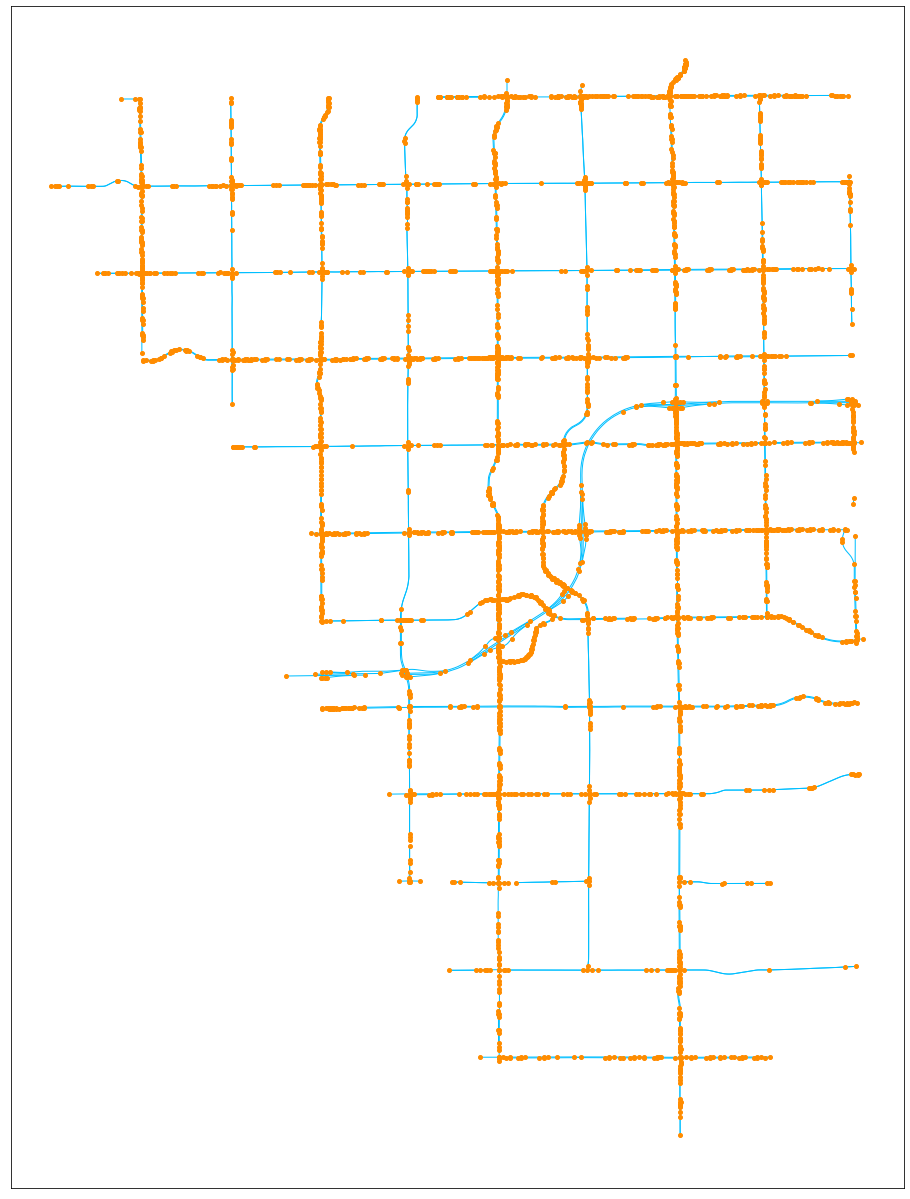

In [30]:
input_file = 'map.osm'
net = og.getNetFromFile(input_file, link_types=('motorway','trunk','primary','secondary')) 

# Use og.show(net) to visualize the network model
og.show(net)

We add tertiary

arguments used for network parsing:
  filename: map.osm
  network_types: ('auto',)
  link_types: ('motorway', 'trunk', 'primary', 'secondary', 'tertiary')
  POI: False
  POI_sampling_ratio: 1.0
  strict_mode: True
  offset: no
  min_nodes: 1
  combine: False
  bbox: None
  default_lanes: False
  default_speed: False
  default_capacity: False
  start_node_id: 0
  start_link_id: 0

Building Network from OSM file
  reading osm file
  parsing osm network
    generating nodes and links
  number of nodes: 4165, number of links: 5907, number of pois: 0


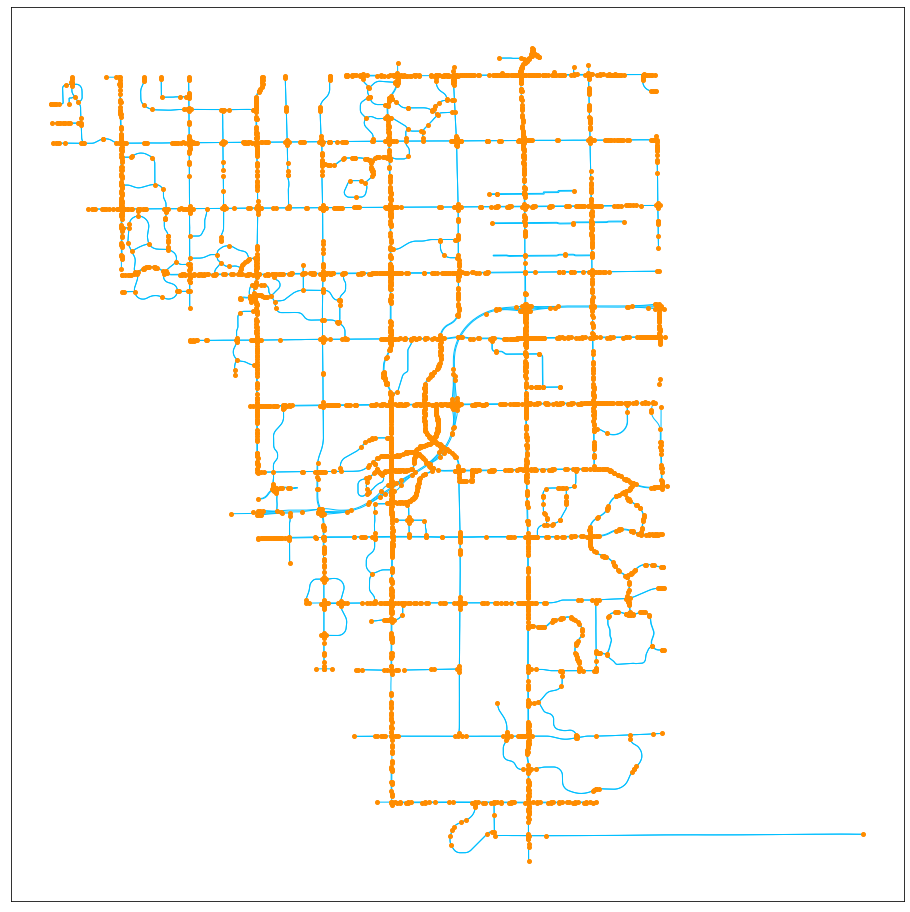

In [31]:
input_file = 'map.osm'
net = og.getNetFromFile(input_file, link_types=('motorway','trunk','primary','secondary','tertiary')) 

# Use og.show(net) to visualize the network model
og.show(net)

arguments used for network parsing:
  filename: map.osm
  network_types: ('auto',)
  link_types: ('motorway', 'trunk', 'primary', 'secondary', 'tertiary', 'residential')
  POI: False
  POI_sampling_ratio: 1.0
  strict_mode: True
  offset: no
  min_nodes: 1
  combine: False
  bbox: None
  default_lanes: False
  default_speed: False
  default_capacity: False
  start_node_id: 0
  start_link_id: 0

Building Network from OSM file
  reading osm file
  parsing osm network
    generating nodes and links
  number of nodes: 15617, number of links: 33988, number of pois: 0


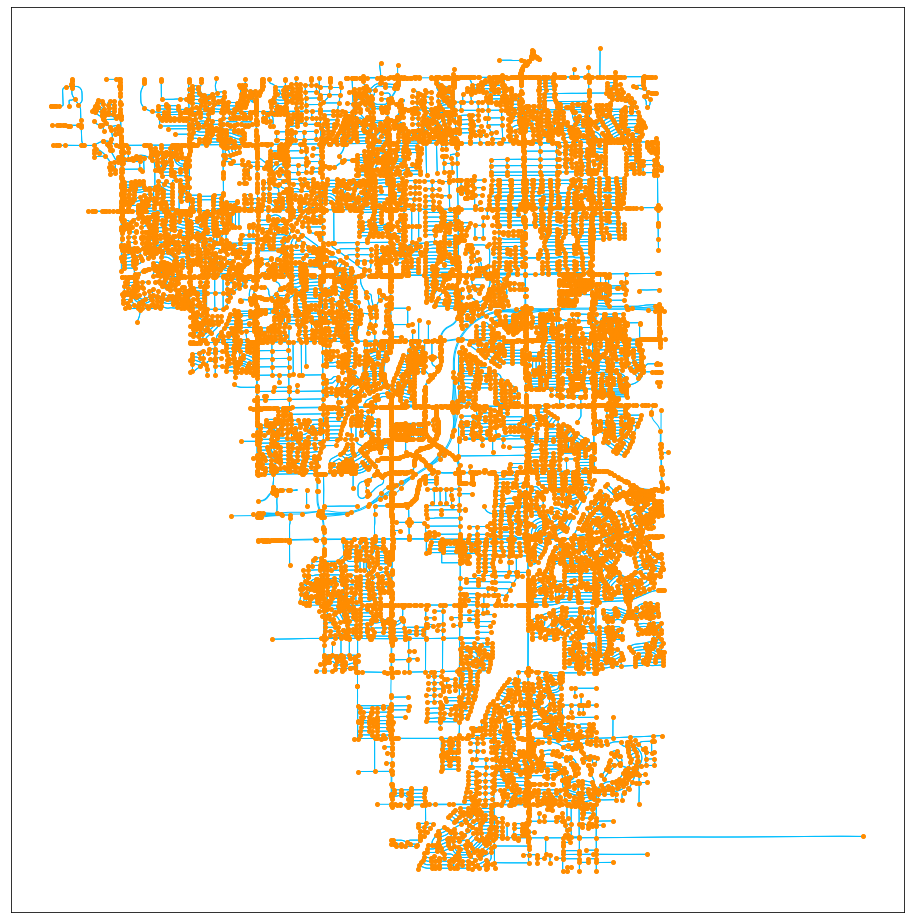

In [32]:
input_file = 'map.osm'
net = og.getNetFromFile(input_file, link_types=('motorway','trunk','primary','secondary','tertiary', 'residential')) 

# Use og.show(net) to visualize the network model
og.show(net)

#4. Modify the network model 

## Example: Consolidate Complex Intersections 
Intersections can have lots of nodes representing different turn lanes, crosswalks, etc. 

Using og.consolidateComplexIntersections(net), we can combine nodes in intersections into a single node to make analysis faster and simpler

Consolidating Complex Intersections
    0 intersections have been consolidated


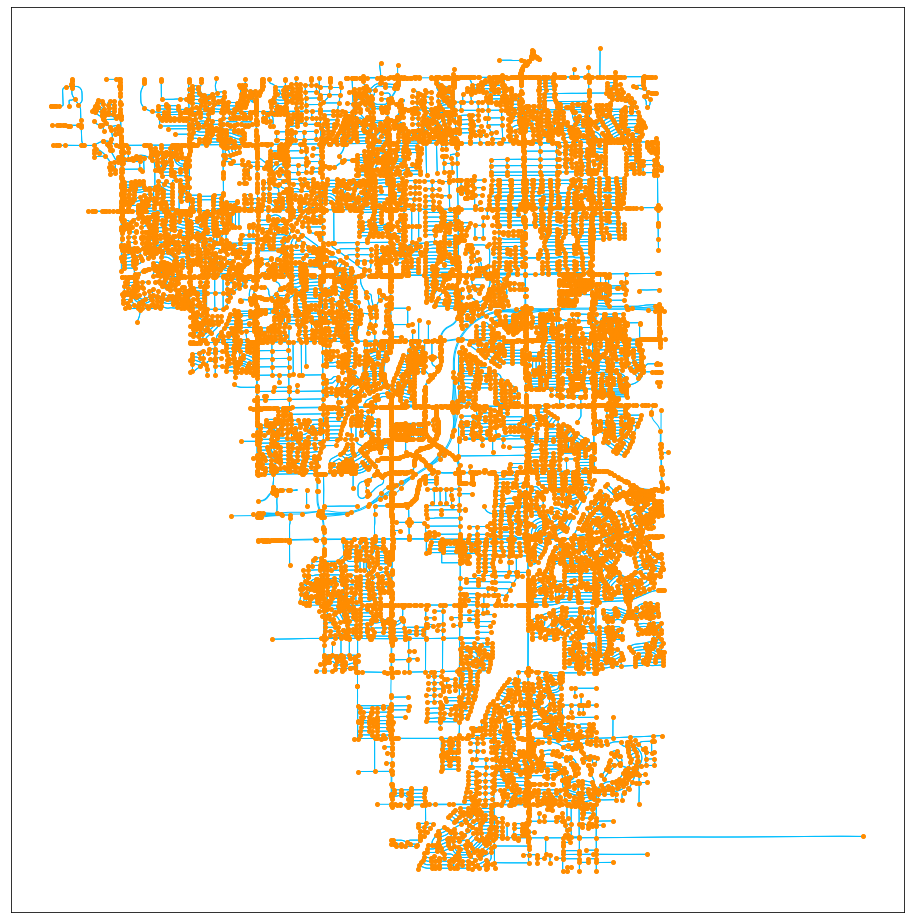

In [33]:
og.consolidateComplexIntersections(net)
og.show(net)

## Example: Points of Interest

We can connect Points of Interest (POIs) to the network model. Nodes representing the center (centroids) of POIs are generated. These nodes are connected with a link to the nearest node on the rest of the network

arguments used for network parsing:
  filename: map.osm
  network_types: ('auto',)
  link_types: ('motorway', 'trunk', 'primary', 'secondary')
  POI: True
  POI_sampling_ratio: 0.05
  strict_mode: True
  offset: no
  min_nodes: 1
  combine: False
  bbox: None
  default_lanes: False
  default_speed: False
  default_capacity: False
  start_node_id: 0
  start_link_id: 0

Building Network from OSM file
  reading osm file
  parsing osm network
    generating nodes and links
    generating POIs
  number of nodes: 3321, number of links: 4339, number of pois: 4550


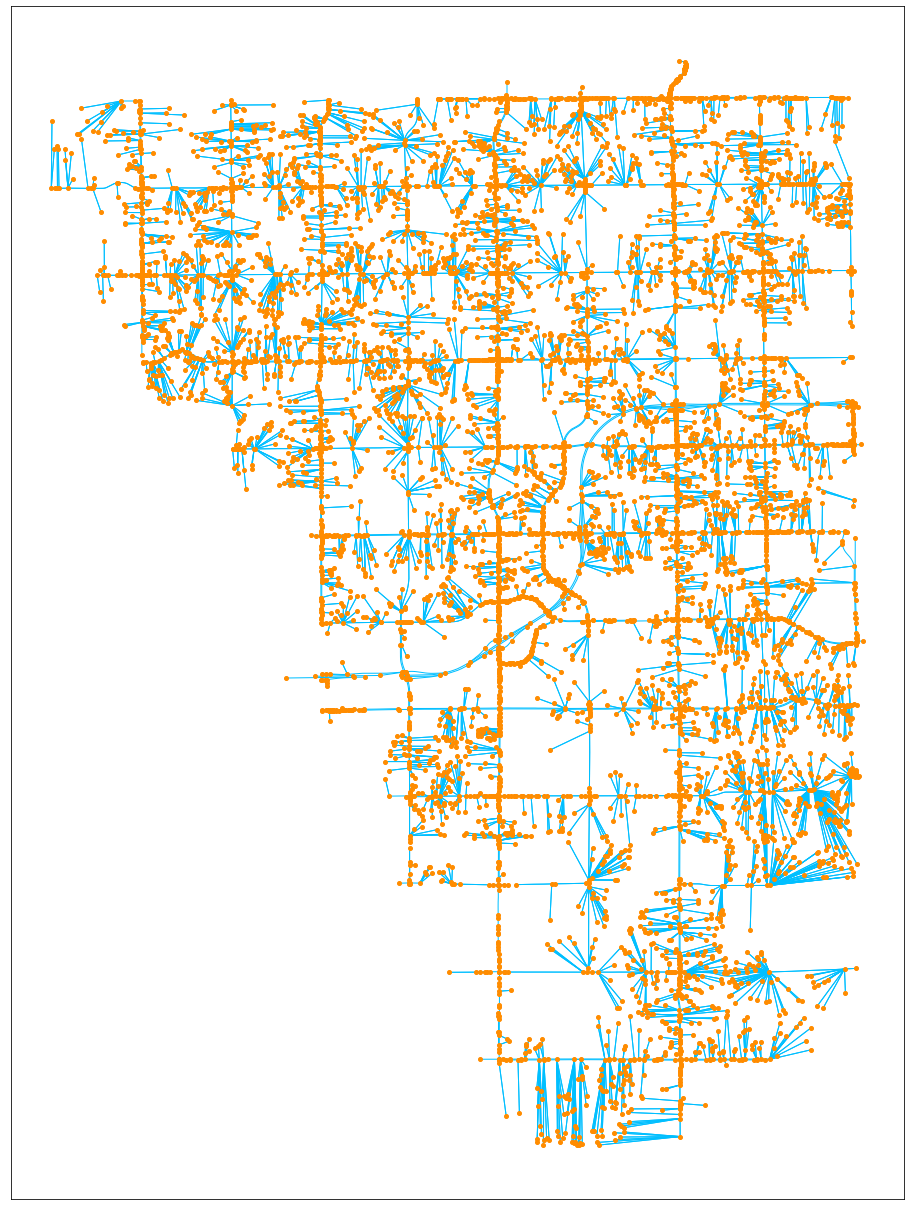

In [34]:
net = og.getNetFromFile('map.osm', link_types=('motorway','trunk','primary','secondary'), POI=True, POI_sampling_ratio=0.05)
og.connectPOIWithNet(net)
og.show(net)

#5. Export transportation network model

We can export our transportation network model to a CSV format for ease of use in further analysis with other systems. 

og.outputNetToCSV(...) will generate two files: node.csv representing nodes, and link.csv representing links (edges) between nodes.

In [35]:

og.outputNetToCSV(net)

Outputting Network Files


In [ ]:
"""
Take a peek at the format of the CSVs using the Pandas library
Loading the CSV files gives us a DataFrame object which is very heavily used in 
data science and analysis. 

For more information on how this data is organized, check out the GMNS specification

https://github.com/zephyr-data-specs/GMNS/pull/54

"""

import pandas as pd

node_dataframe = pd.read_csv("node.csv")
node_dataframe.head()

,name,node_id,osm_node_id,osm_highway,zone_id,ctrl_type,node_type,activity_type,is_boundary,x_coord,y_coord,intersection_id,poi_id,notes
0,NaN,0,4.205830e+09,NaN,NaN,NaN,NaN,NaN,NaN,-73.960423,40.798207,NaN,NaN,NaN
1,NaN,1,4.205830e+09,NaN,NaN,NaN,NaN,NaN,NaN,-73.961106,40.798494,NaN,NaN,NaN
2,NaN,2,4.242209e+07,NaN,NaN,NaN,NaN,NaN,NaN,-73.933387,40.801644,NaN,NaN,NaN
3,NaN,3,7.925259e+09,traffic_signals,NaN,signal,NaN,NaN,NaN,-73.933812,40.802004,NaN,NaN,NaN
4,NaN,4,4.242211e+07,NaN,NaN,NaN,NaN,NaN,NaN,-73.933771,40.802147,NaN,NaN,NaN


In [36]:
link_dataframe = pd.read_csv("link.csv")
link_dataframe.head()

,name,link_id,osm_way_id,from_node_id,to_node_id,dir_flag,length,lanes,free_speed,capacity,link_type_name,link_type,geometry,allowed_uses,from_biway,is_link,VDF_fftt1,VDF_cap1
0,North Lindsay Road,0,5591767.0,0,1,1,65.65,3.0,NaN,NaN,secondary,4,"LINESTRING (-111.7734025 33.3651771, -111.7733...",auto,1,0,NaN,NaN
1,North Lindsay Road,1,5591767.0,1,0,1,65.65,2.0,NaN,NaN,secondary,4,"LINESTRING (-111.7733430 33.3645872, -111.7733...",auto,1,0,NaN,NaN
2,South Cooper Road,2,5592362.0,2,3,1,1330.03,2.0,72.0,NaN,secondary,4,"LINESTRING (-111.8069468 33.3369685, -111.8069...",auto,1,0,NaN,NaN
3,South Cooper Road,3,5592362.0,3,2,1,1330.03,2.0,72.0,NaN,secondary,4,"LINESTRING (-111.8070059 33.3489645, -111.8070...",auto,1,0,NaN,NaN
4,South Recker Road,4,5601928.0,4,5,1,262.78,2.0,NaN,NaN,secondary,4,"LINESTRING (-111.7049556 33.3727631, -111.7049...",auto,1,0,NaN,NaN


In [ ]:
link_dataframe = pd.read_csv("poi.csv")
link_dataframe.head()

,name,poi_id,osm_way_id,osm_relation_id,building,amenity,leisure,way,geometry,centroid,area,area_ft2
0,NaN,0,264643810.0,NaN,yes,NaN,NaN,NaN,"POLYGON ((-74.0002488 40.7448561, -74.0002946 ...",POINT (-74.0002231 40.7449495),122.6,1319.7
1,NaN,1,249657791.0,NaN,apartments,NaN,NaN,NaN,"POLYGON ((-73.9812363 40.7286261, -73.981324 4...",POINT (-73.9814106 40.7285378),526.2,5664.5
2,NaN,2,264650593.0,NaN,yes,NaN,NaN,NaN,"POLYGON ((-73.9960311 40.744946, -73.9960629 4...",POINT (-73.9962651 40.7449978),864.6,9306.3
3,NaN,3,241822236.0,NaN,apartments,NaN,NaN,NaN,"POLYGON ((-73.9863434 40.7281522, -73.9864236 ...",POINT (-73.9863297 40.7282429),145.0,1560.5
4,NaN,4,275063030.0,NaN,yes,NaN,NaN,NaN,"POLYGON ((-73.93721 40.8469871, -73.9373423 40...",POINT (-73.9374191 40.8469578),631.2,6794.3


#6. Basic analysis with Pandas

The node and link files are in CSV format, which can be used with a wide variety of programming languages, such as R, and programs, such as Excel.

Here, we show a quick demonstration of some simple analysis using Python

In [ ]:
# From the previous cells, we have pandas DataFrame objects representing the node and link data for our model
print(node_dataframe.head(), link_dataframe.head())

  name  node_id   osm_node_id      osm_highway  zone_id ctrl_type  node_type  \
0  NaN        0  4.205830e+09              NaN      NaN       NaN        NaN   
1  NaN        1  4.205830e+09              NaN      NaN       NaN        NaN   
2  NaN        2  4.242209e+07              NaN      NaN       NaN        NaN   
3  NaN        3  7.925259e+09  traffic_signals      NaN    signal        NaN   
4  NaN        4  4.242211e+07              NaN      NaN       NaN        NaN   

   activity_type  is_boundary    x_coord    y_coord  intersection_id  poi_id  \
0            NaN          NaN -73.960423  40.798207              NaN     NaN   
1            NaN          NaN -73.961106  40.798494              NaN     NaN   
2            NaN          NaN -73.933387  40.801644              NaN     NaN   
3            NaN          NaN -73.933812  40.802004              NaN     NaN   
4            NaN          NaN -73.933771  40.802147              NaN     NaN   

   notes  
0    NaN  
1    NaN  
2    